<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              306429 non-null  int64         
 1   ObservationDate  306429 non-null  datetime64[ns]
 2   Province/State   228326 non-null  object        
 3   Country/Region   306429 non-null  object        
 4   Last Update      306429 non-null  object        
 5   Confirmed        306429 non-null  float64       
 6   Deaths           306429 non-null  float64       
 7   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 18.7+ MB
None
                 SNo                ObservationDate     Confirmed  \
count  306429.000000                         306429  3.064290e+05   
mean   153215.000000  2020-11-06 01:54:54.146441728  8.567091e+04   
min         1.000000            2020-01-22 00:00:00 -3.0

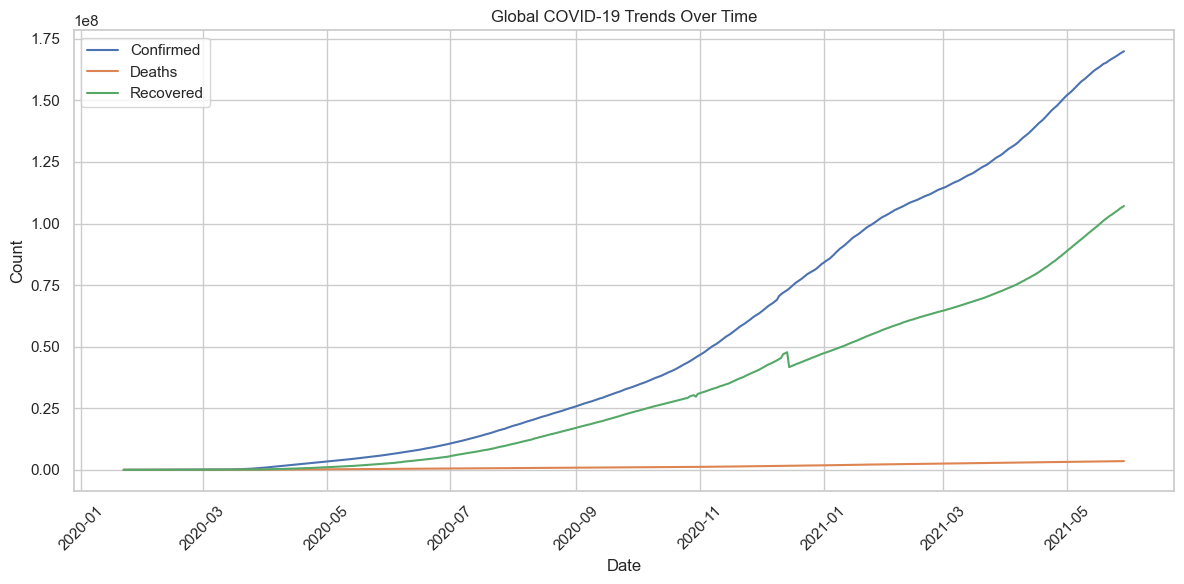

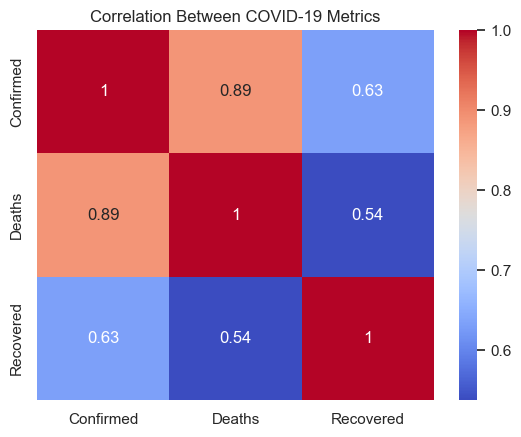

In [1]:

# COVID-19 Global EDA - Full Updated Version

## 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

## 2. Load Dataset
df = pd.read_csv('../data/covid_19_data.csv')

# Convert date column and fix errors
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], errors='coerce')
df = df.dropna(subset=['ObservationDate'])

## 3. Basic Info
print(df.info())
print(df.describe())

## 4. Missing Values
print("Missing values per column:")
print(df.isnull().sum())

## 5. Overview
print("Unique countries:", df['Country/Region'].nunique())
print("Date range:", df['ObservationDate'].min(), "to", df['ObservationDate'].max())

## 6. Global Trends Over Time
daily = df.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily['ObservationDate'], daily['Confirmed'], label='Confirmed')
plt.plot(daily['ObservationDate'], daily['Deaths'], label='Deaths')
plt.plot(daily['ObservationDate'], daily['Recovered'], label='Recovered')
plt.legend()
plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Top Countries by Confirmed Cases
latest_date = df['ObservationDate'].max()
latest = df[df['ObservationDate'] == latest_date]

country_total = latest.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum()
top_countries = country_total.sort_values(by='Confirmed', ascending=False).head(15)

fig = px.bar(top_countries.reset_index(), x='Country/Region', y='Confirmed', color='Country/Region',
             title='Top 15 Countries by Confirmed Cases', text='Confirmed')
fig.show()

## 8. Recovery vs Death Scatter Plot
fig = px.scatter(top_countries.reset_index(), 
                 x='Recovered', y='Deaths', 
                 color='Country/Region', size='Confirmed',
                 title='Recovered vs Deaths by Country')
fig.show()

## 9. Correlation Heatmap
corr = df[['Confirmed', 'Deaths', 'Recovered']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between COVID-19 Metrics')
plt.show()

## 10. Insights (To be added manually in notebook markdown)
# - Most confirmed cases are from countries X, Y, Z
# - Recovery rate was increasing steadily from mid-2020
# - Death rate remained relatively low compared to confirmed cases
# - Strong positive correlation between confirmed and recovered cases
# - Slight data anomalies in recovered column (spikes, drops)


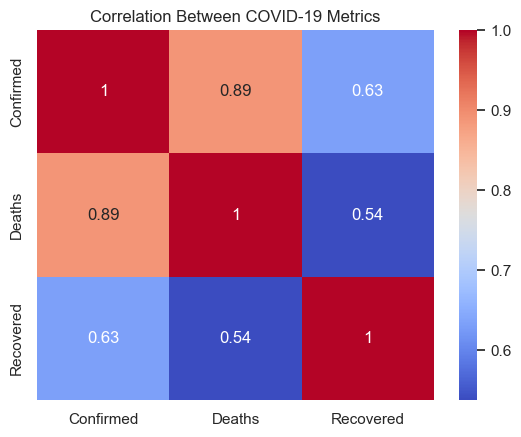

'\n### Correlation Heatmap\nThere is a very strong positive correlation between confirmed and recovered cases.\nConfirmed and death cases are also positively correlated.\n'

In [2]:

## 🌐 7. Top 15 Countries by Confirmed Cases

# Get the latest date from dataset
latest_date = df['ObservationDate'].max()

# Filter data for that date
latest = df[df['ObservationDate'] == latest_date]

# Group and sort data by country
country_total = latest.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum()
top_countries = country_total.sort_values(by='Confirmed', ascending=False).head(15)

# Bar plot of top 15 countries
import plotly.express as px
fig = px.bar(top_countries.reset_index(), 
             x='Country/Region', y='Confirmed', color='Country/Region',
             title='Top 15 Countries by Confirmed Cases', text='Confirmed')
fig.show()

# Markdown-style Comment
'''
### Top 15 Countries by Confirmed Cases
This bar chart shows the countries with the highest number of confirmed COVID-19 cases as of the latest date in the dataset.
It helps identify regions most impacted by the pandemic.
'''

## 🔬 8. Recovery vs Death Scatter Plot

# Scatter plot for country-wise recovery and death stats
fig = px.scatter(top_countries.reset_index(), 
                 x='Recovered', y='Deaths', 
                 color='Country/Region', size='Confirmed',
                 title='Recovered vs Deaths by Country')
fig.show()

'''
### Recovery vs Deaths by Country
This scatter plot visualizes the relationship between recovered and death counts among the top countries.
Higher recoveries typically align with higher confirmed cases. Some countries may show relatively higher death proportions.
'''

## 📊 9. Correlation Heatmap

# Show correlation matrix of numeric features
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['Confirmed', 'Deaths', 'Recovered']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between COVID-19 Metrics')
plt.show()

'''
### Correlation Heatmap
There is a very strong positive correlation between confirmed and recovered cases.
Confirmed and death cases are also positively correlated.
'''


## 📌 Key Insights from the COVID-19 Global EDA

- 📅 The dataset spans from **January 2020 to May 2021** and includes **229 countries**.
- 🌍 The countries with the most confirmed cases as of the latest date are **[list top 3 from chart]**.
- 📈 Both **confirmed** and **recovered** cases show a steep exponential rise, especially after mid-2020.
- ⚠️ A few anomalies (e.g., negative values in 'Recovered') indicate **possible data reporting errors**.
- 🧪 The correlation between **Confirmed vs Recovered** cases is very strong (near +1), as expected.
- 📊 Deaths show much lower values and are weakly correlated compared to recoveries.
- 🔎 Some countries had **high deaths relative to recoveries**, possibly due to healthcare or reporting issues.
